In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
x=np.array([0.0,1.0,1.3,2.5,3.0,3.3,4.5,5.6,6.0,7.3,7.8,8.1,8.9,10.0,11.0,
            12.1,12.9,13.5,14.2,15.0,15.8,16.5,17.1,18.0,19.5,20.0])
f=np.array([0.1,1.2,1.5,3.8,3.7,4.5,4.7,5.2,4.5,4.3,2.8,3.1,1.5,0.8,-2.1,
            -2.1,-3.5,-4.5,-4.5,-5.3,-4.1,-4.5,-3.1,-3.7,-1.5,-0.1])

As initial guess, I'll take A (amplitude) to be the maximum value of f, as that's approximately how much the amplitude of my sinusoid should be.

As for omega, we know that the period of sine is $2\pi$, so the period for $sin(\omega x) = \frac{2\pi}{\omega}$. As we can roughly see from the data, our period is almost 20, so taking $\omega = \frac{\pi}{10}$ will probably be a good choice.

In [23]:
A_init = max(f)
w_init = np.pi/10

In [24]:
def Aw_Norm(A,A_prev,w,w_prev):
    norm = (abs(A-A_prev) + abs(w-w_prev))/2
    return norm

def S_A(A,w):
    res = sum([np.sin(w*x[i])*(A*np.sin(w*x[i])-f[i]) for i in range(26)])
    return res

def S_w(A,w):
    res = sum([A*x[i]*np.cos(w*x[i])*(A*np.sin(w*x[i])-f[i]) for i in range(26)])
    return res

def S_A_A(A,w):
    res = sum([np.sin(w*x[i])**2 for i in range(26)])
    return res
    
def S_A_w(A,w):
    res=sum([A*x[i]*np.sin(2*w*x[i])-f[i]*x[i]*np.cos(w*x[i]) for i in range(26)])
    return res

def S_w_w(A,w):
    res=sum([((A*x[i])**2)*np.cos(2*w*x[i])+A*f[i]*(x[i]**2)*np.sin(w*x[i]) for i in range(26)])
    return res

def S_Hessian_Det(A,w):
    res=S_A_A(A,w)*S_w_w(A,w)-S_A_w(A,w)**2
    return res

def find_deltas(A,w):
    delta1=(S_A_w(A,w)*S_w(A,w)-S_A(A,w)*S_w_w(A,w))/S_Hessian_Det(A,w)
    delta2=(S_A_w(A,w)*S_A(A,w)-S_w(A,w)*S_A_A(A,w))/S_Hessian_Det(A,w)
    return delta1, delta2

def solve(A,w):
    A_prev=A
    w_prev=w
    norm=1e10
    eps=1e-5
    while (norm>eps):
        deltaA, deltaw = find_deltas(A_prev,w_prev)
        A_curr, w_curr = A_prev + deltaA, w_prev + deltaw
        norm = Aw_Norm(A_curr, A_prev, w_curr, w_prev)
        A_prev, w_prev = A_curr, w_curr
    return A_prev, w_prev


In [25]:
A_res, w_res = solve(A_init,w_init)
print(A_res, w_res)

4.84553706683 0.309929463021


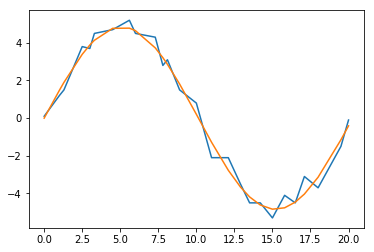

In [26]:
plt.plot(x,f)
plt.plot(x, A_res*np.sin(w_res*x))
plt.show()